# ARIMA and Seasonal ARIMA

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Dataset/TimeSeries/perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
# Cleaning up data
df.columns=['Month', 'Sales']

In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.drop(106, axis=0, inplace=True)

In [9]:
df.drop(105, axis=0, inplace=True)

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
# Converting Month column into Datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.set_index('Month', inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


## Visualize the data

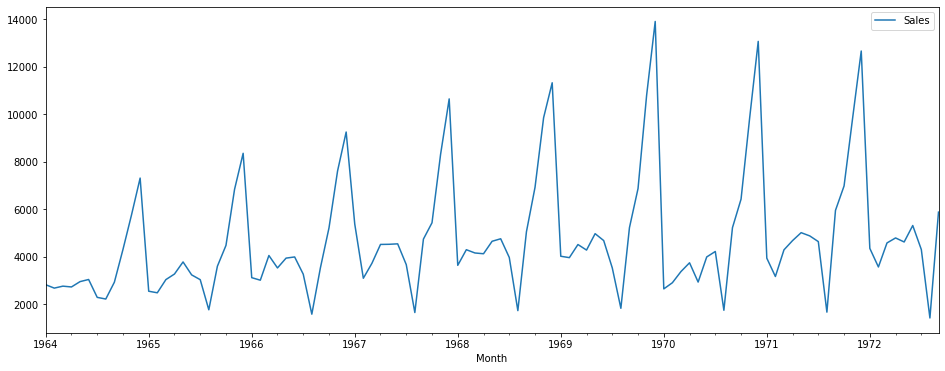

In [16]:
df.plot(figsize=(16, 6))

In [18]:
# Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Sales'])
test_result

In [20]:
# H0: It is non-stationary
# H1: It is stationary

def adfuller_test(sales):
  result = adfuller(sales)

  labels = ['ADF Test Statistic', 'p-value', '# lags used', '# observations used']

  for value, label in zip(result, labels):
    print(label + ':' + str(value))

  if result[1] <= 0.05:
    print('Rejecting Null-Hypothesis. Data is stationary')
  else:
    print('Weak evidence against Null-Hypothesis. Data is non-stationary')

In [21]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.8335930563276188
p-value:0.363915771660247
# lags used:11
# observations used:93
Weak evidence against Null-Hypothesis. Data is non-stationary


# DIFFERENCE
#### As the data is having seasonal pattern, we will shift by 12 months and see the difference

In [23]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [24]:
df.head(15)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [25]:
# Again testing by Dickey-Fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-7.626619157213166
p-value:2.0605796968136632e-11
# lags used:0
# observations used:92
Rejecting Null-Hypothesis. Data is stationary


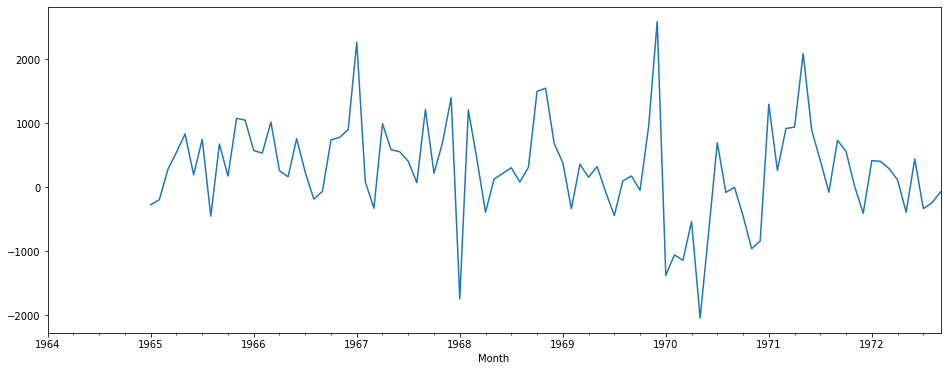

In [26]:
df['Seasonal First Difference'].plot(figsize=(16, 6))

# AUTO-REGRESSIVE MODEL

In [28]:
from pandas.plotting import autocorrelation_plot

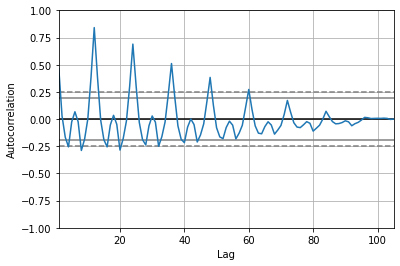

In [32]:
autocorrelation_plot(df['Sales'])

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
import statsmodels.api as sm

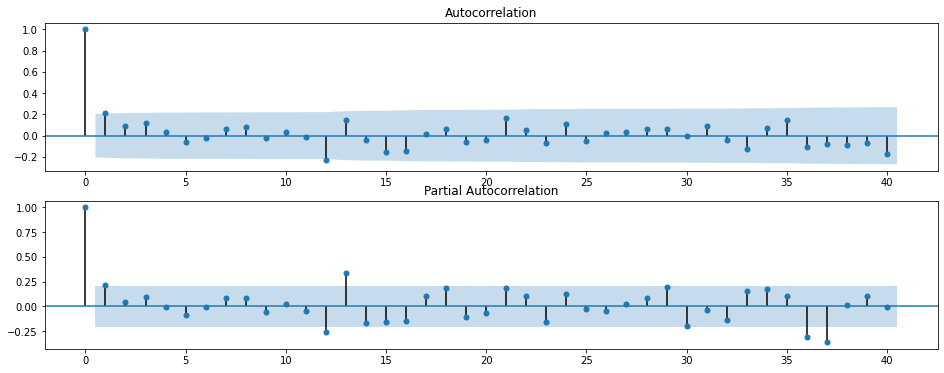

In [37]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [41]:
# For non-seasonal data
# p=1, d=1, q=0/1
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 01 Sep 2022   AIC                           1911.627
Time:                        13:28:30   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

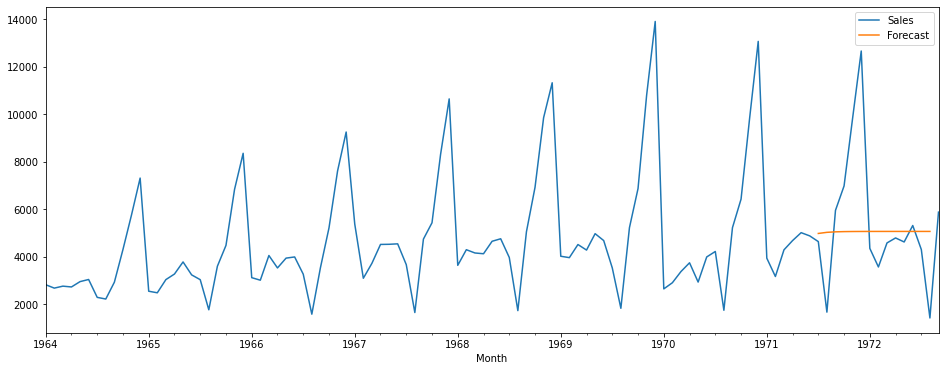

In [44]:
df['Forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'Forecast']].plot(figsize=(16, 6))

In [45]:
mod = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
res = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


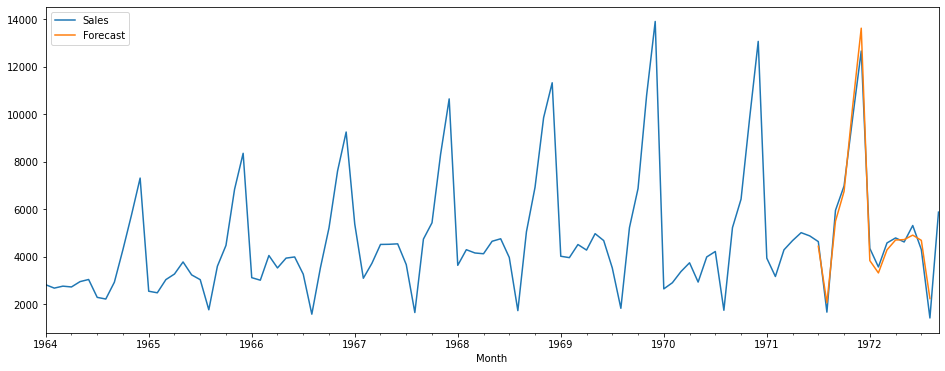

In [46]:
df['Forecast'] = res.predict(start=90, end=103, dynamic=True)
df[['Sales', 'Forecast']].plot(figsize=(16, 6))

# FORECASTING THE FUTURE

In [47]:
from pandas.tseries.offsets import DateOffset

In [48]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]

In [49]:
future_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [51]:
future_df.tail()

,Sales,Seasonal First Difference,Forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [52]:
future_df = pd.concat([df, future_df])

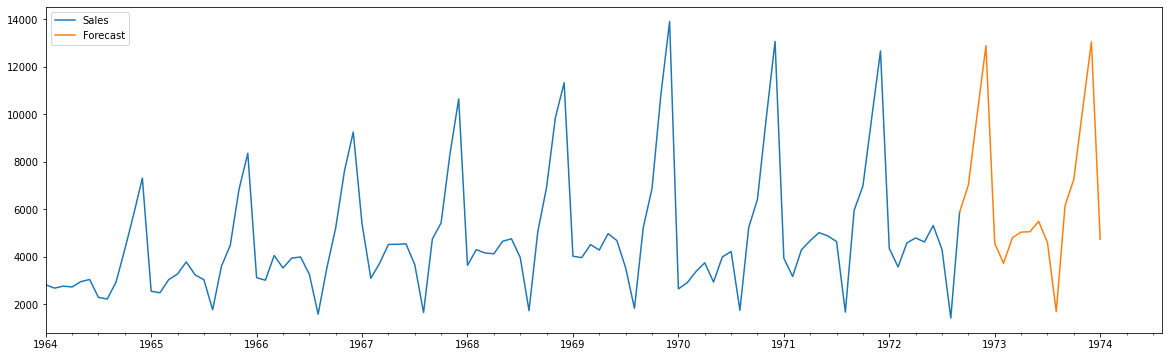

In [62]:
future_df['Forecast'] = res.predict(start=104, end=120, dynamic=True)
future_df[['Sales', 'Forecast']].plot(figsize=(20, 6))

In [63]:
future_df['Forecast']

1964-01-01   NaN
1964-02-01   NaN
1964-03-01   NaN
1964-04-01   NaN
1964-05-01   NaN
              ..
1974-04-01   NaN
1974-05-01   NaN
1974-06-01   NaN
1974-07-01   NaN
1974-08-01   NaN
Name: Forecast, Length: 128, dtype: float64